Introduction

This project aims to perform a sentiment analysis on the reviews behind hotel reviews by using different machine learnig models. Examples include a logistic regression model, KNN model and Decision tree model. 

Tabel of content

What is the data?

-Additional_Number_of_Scoring: Scoring wihtout review.	

-Average_Score:	Average Score of the hotel

-Review_Total_Negative_Word_Counts:Total number of words in the negative review	

-Total_Number_of_Reviews:Total number of valid reviews the hotel has

-Review_Total_Positive_Word_Counts:Total number of words in the positive review

-Total_Number_of_Reviews_Reviewer_Has_Given:Number of Reviews the reviewers has given in the past. 	

-days_since_review:Duration between the review date and scrape date. 	

-lat:Latitude of the hotel	

-lng:longtitude of the hotel

-weekday_of_review: weekday of the review was made	

-month_of_review: moth of the review was made	

-year_of_review: year of the review was made	

-bed_single: Did the hotel room of the reviewer stayed in contian a single bed ?	

-bed_double:  Did the hotel room of the reviewer stayed in contian a double bed ?	

-bed_queen: Did the hotel room of the reviewer stayed in contian a queen size bed?	

-bed_king: Did the hotel room of the reviewer stayed in contian a king size bed?	

-trip_leisure: Was the trip of the reviewer for leisure?	

-trip_biz: Was the trip of the reviewer for business?	

-group_solo: Did the reviewers travel solo?	

-group_couple: Did the reviewers travel with a partner?

-group_family:Did the reviewers travel with family?

-Hotel_name: Name of hotel

-rating: rating given to the hotel

Where does it come from?

-It contains reviews of customers and scoring of hotels.

what type of analysis is contained in the notebook?
1. Modeling - Logsitic Regression Model

    a) Fit a logistic regression model

    b) 20 words most predictive of a good review and 20 words most predictive with a bad review

    c) PCA 

    d) one advantage and one disadvantage of dimensionality reduction    
2. Modeling - KNN model

    a) Fit a KNN model

    b) Relationship between the number of observations and run-time for KNN

    c) one advantage and one disadvantage of reducing the number of observations

    d) Optimal K value

    e) Issues in data splitting after vectorization
    
3. Modeling - Decision Tree Classifier

    a) Fit a decision tree model

    b) Optimal value for the maximum depth of the decision tree

    c) Compare and contrast decision trees and KNN
    


4. Purpose of the validation set



5. Re-run decision tree

    a) Optimization of the hyperparameters

    b) Confusion matrix



6. Creating one new feature - ratio of no. of good review words over no. of bad review words

    a) Why this new feature

    b) Run decision tree with this new feature; new accuracy score




Question 1. Employ a linear classifier on this dataset:

a. Fit a logisitic regression model to this data with the solver set to lbfgs. What is the accuracy score on the test set?

Before begining the logistic regression model, we need to clean and preprocess the dataset first.

In [1]:
#import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#import test and train data sets and check the no. of rows and columns to see if they are split for subsequenct analysis
test_set = pd.read_csv('clean_test_dataframe.csv')
train_set = pd.read_csv('clean_train_dataframe.csv')

print('Shape of trainset: ', train_set.shape)
print('Shape of testset: ', test_set.shape)
print('% of data split:', test_set.shape[0]/train_set.shape[0]*100)

Shape of trainset:  (12798, 2744)
Shape of testset:  (4267, 2744)
% of data split: 33.34114705422722


Now we can see that the data is split into ~ 6.66:3.33 ratio. Also, we can see that the two datasets have the same number of columns.

Next, we have to assign depdendent varaible Y(rating), and indepdendent variable X (the remaining columns)

In [3]:
# Since y is the depdendent variable, we can drop Y when extracting for X columns
X_train = train_set.drop(columns=['rating'])
y_train = train_set['rating']
X_test = test_set.drop(columns=['rating'])
y_test = test_set['rating']

Even though we know that the dataset is split into testing and training datasets, we also have to know if the target column (dependent varaible) is split proportionally, preferrably each calss should be 50%. This is because we want to feed the model with equal amount of class to prevent bias.  

In [4]:
# Proportion of classes (0 or 1) in the target column
print('Class proportions of Training set :')
print(y_train.value_counts(normalize=True))
print('Class proportions of Testing set :')
print(y_test.value_counts(normalize=True))

Class proportions of Training set :
1    0.576106
0    0.423894
Name: rating, dtype: float64
Class proportions of Testing set :
1    0.576049
0    0.423951
Name: rating, dtype: float64


The results show that the two classes are split close to 50% in both training and testing datasets, suggesting the there is no bais to majority class.

Now we are done with data preprocessing and cleaning, so we can start our logistic modeling

In [5]:
#import library for modeling
from sklearn.linear_model import LogisticRegression

#start logistic modeling
log = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)

#fit logistic modeling
log.fit(X_train, y_train)
 
#generate estimated output labels for the input data (X_test)
y_pred = log.predict(X_test)
 
print('Test set accuracy:', log.score(X_train, y_train))
print('Train set accuracy:', log.score(X_test, y_test))


C:\Users\Jason\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Test set accuracy: 0.7801218940459447
Train set accuracy: 0.7696273728614952


As per the warning suggested, the model does not converge. As such, data are scaled appropriately.

In [6]:
#Import libraries
from sklearn.preprocessing import StandardScaler

# Create an instance of the scaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Apply the scaling transformation to the training and test data
trainscaled = scaler.transform(X_train)
testscaled = scaler.transform(X_test)

# Create an instance of LogisticRegression with specified parameters
log_scaled = LogisticRegression(solver='lbfgs', multi_class='multinomial', max_iter=1000)
 
# Fit the model on the scaled training data
log_scaled.fit(trainscaled, y_train)

# Use the model to predict the labels for the scaled test data
y_pred_scaled = log_scaled.predict(testscaled)
 
print('Scaled train set accuracy: ', log_scaled.score(trainscaled, y_train))
print('Scaled test set accuracy: ', log_scaled.score(testscaled, y_test))

Scaled train set accuracy:  0.8855289889045164
Scaled test set accuracy:  0.7328333723927818


The results suggest that the model is now converged and has a test score of 0.7328. The performance drops from the training set to the test set, suggesting that the model may be slightly overfittting the training set.

Question 1B: Top 20 and Bottom 20 features 

In [8]:
#creates a DataFrame importance with columns from X-train and cooresponding coefficients from log_scaled
importance = pd.DataFrame({'feature': X_train.columns, 'importance': log_scaled.coef_[0]})

#sorts the importance DataFrame in descending order based on the 'importance' column.
importance.sort_values(by='importance', ascending=False, inplace=True)

# creates the positive Dataframe by filtering the 'feature' column starts with the letter 'p'. 
positive = importance[importance['feature'].str.startswith('p')]

# creates the negative Dataframe by filtering the 'feature' column starts with the letter 'n'. 
negative = importance[importance['feature'].str.startswith('n')]

# selects the top 20 rows from the positive DataFrame
top_20 = positive.head(20)

# selects the bottom 20 rows from the negative DataFrame
bottom_20 = negative.tail(20)


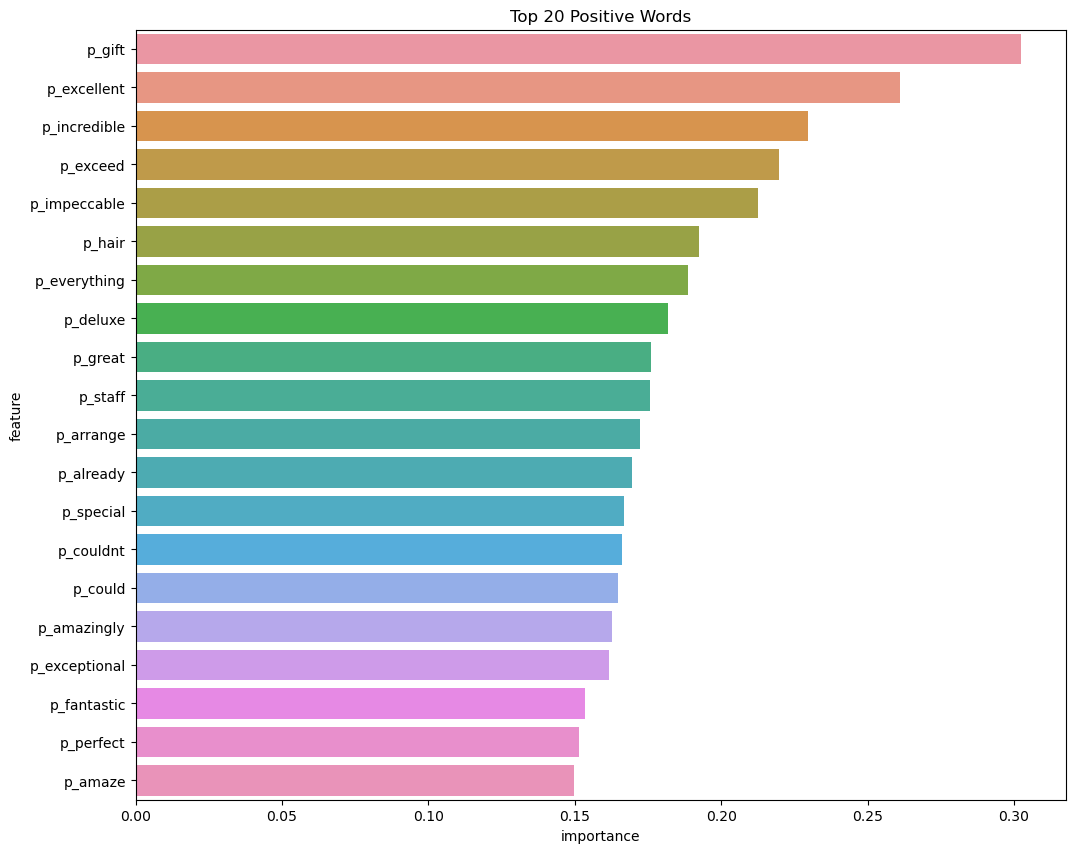

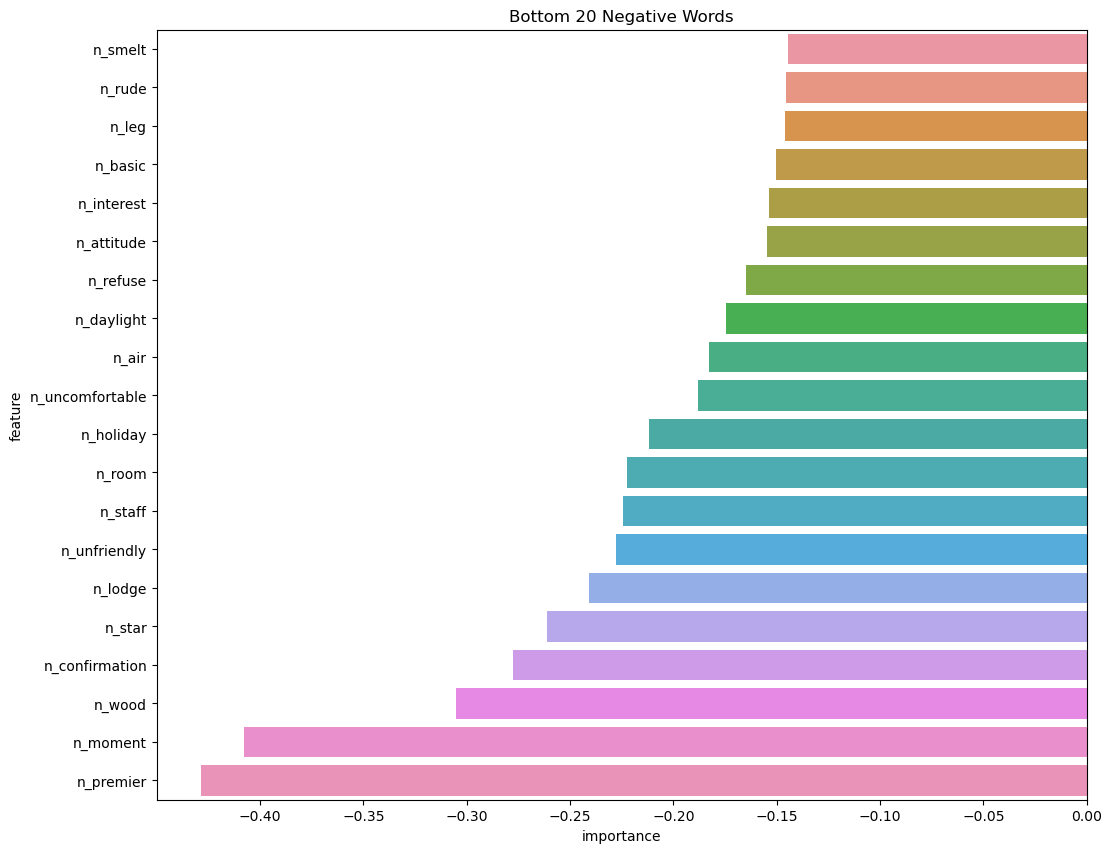

In [10]:
# plotting the top 20 positive words most predictive of a good review
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20)
plt.title('Top 20 Positive Words')
plt.show()

# plotting the bottom 20 negative words most predictive of a bad review
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=bottom_20)
plt.title('Bottom 20 Negative Words')
plt.show()

The results in Top 20 positive words and Bottom 20 negative words make sense, suggesting we are able to extract and categorize them into correct groups.

Question 1C: PCA

In [11]:
# Import the PCA class from scikit-learn
from sklearn.decomposition import PCA

# Create an instance of PCA to keep 90% of the variance
PCA = PCA(n_components = 0.8)

# Fit the PCA model on the scaled training data
PCA.fit(trainscaled)

# Transform the training data using the learned PCA transformation
train_PCA = PCA.transform(trainscaled)

# Transform the test data using the same PCA transformation
test_PCA = PCA.transform(testscaled)

print('Shape of the train set: ', trainscaled.shape)
print('Shape of the PCA transformed train set: ', train_PCA.shape)

Shape of the train set:  (12798, 2743)
Shape of the PCA transformed train set:  (12798, 1458)


The dimenionality of the data is reduced to 80% of the variance. 

Next, we measure  the runtime of fitting a logistic regression model using two different datasets: trainscaled and train_PCA.

In [12]:
import timeit

# Measure the runtime of fitting the original model

# First, start the timer to measure the execution time
start = timeit.default_timer()

# fits the logistic regression model on the trainscaled with the y_train.
log.fit(trainscaled, y_train)

#stops the timer
stop = timeit.default_timer()

print('The runtime of the original model is: ', stop - start)
 
# Measure the runtime of fitting the PCA model
start = timeit.default_timer()
log.fit(train_PCA, y_train)
stop = timeit.default_timer()
print('The runtime of the PCA model is: ', stop - start)


The runtime of the original model is:  17.03911060001701
The runtime of the PCA model is:  4.6099775999900885


The results suggest that the runtime decreases by 70% after reducing the dimensionality. This means that the relationship between the number of dimensions and the time it takes to fit a logistic regression model is linear.

Question 1D: List one advantage and one disadvantage of dimensionality reduction

An advantage of dimensionality reduction is that it reduces the computational cost of algorithms by working with a reduced set of features.

An disadvanage of dimensionality reduction is that there is a risk of losing some useful information during the reduction process. 

Question 2A : Fit a KNN model

In [13]:
# Import the libraries for KNN
from sklearn.neighbors import KNeighborsClassifier

# Create an instance of the KNeighborsClassifier
knnscaled = KNeighborsClassifier()
 
# Fit the K-nearest neighbors model on the scaled training data (trainscaled)
knnscaled.fit(trainscaled, y_train)

# Use the model to predict the labels for the scaled test data (testscaled)
y_pred_knn_scaled = knnscaled.predict(testscaled)
 
print('KNN Training score: ', knnscaled.score(trainscaled, y_train))
print('KNN Test score: ', knnscaled.score(testscaled, y_test))

KNN Training score:  0.751211126738553
KNN Test score:  0.6367471291305367


There is a performance drop from the training set to the test set, suggesting that the model may be slightly overfitting the training data.

Question 2B: relationship between the number of observations and run-time for KNN

The relationship is linear. As KNN calculates the distances between each test sample and all the training samples to determine the nearest neighbors, when there are more training samples, the algorithm needs to compare the test sample against more data points, resulting longer computation time.

Question 2C: List one advantage and one disadvantage of reducing the number of observations.

An advantage of reducing th number of observations is that it reduces the computational cost of algorithms by working with a reduced set of features.

An disadvanage of reducing the number of bservations is that there is a risk of losing some useful information during the reduction process. 

Question 2D: Optimal value of K

In [14]:
#imports the train_test_split function from scikit-learn to split data
from sklearn.model_selection import train_test_split

#splits the training data into trainign set and validation set; 25% of the training sata
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1, stratify=y_train)

#creates an instance of the StandardScaler class to perform scaling
scaler = StandardScaler()
 
#fits the scaler on the training data (X_train)
scaler.fit(X_train)
 
# transforms the training data (X_train) using the learned scaling parameters
X_train_scaled = scaler.transform(X_train)

#  transforms the validation data (X_val) using the same scaling parameters obtained from the training data
X_val_scaled = scaler.transform(X_val)

# empty lists to store the training and validation accuracy scores for different values of n_neighbors
training = []
validation = []

#creates a range of odd values from 1 to 51 (exclusive) to be used as n_neighbors parameter for algorithm
neighbors = range(1, 51, 2)

# loops through the K values on scaled data
for n_neighbors in neighbors:
    # creates an instance of the KNeighborsClassifier class
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    # fits the K-nearest neighbors model
    knn.fit(X_train_scaled, y_train)
    # computes the accuracy using score method of the K-model and appends it to the training list.
    training.append(knn.score(X_train_scaled, y_train))
    # computes the accuracy using score method of the K-model and appends it to the validation list.
    validation.append(knn.score(X_val_scaled, y_val))
    
# determines the optimal number of neighbors by finding the index of the maximum validation accuracy score in the validation list 
optimal = neighbors[validation.index(max(validation))]
print('The optimal value for K is: ', optimal)

The optimal value for K is:  21


Question 2E: What is the issue with splitting the data into train and validation sets after performing vectorization? 

Performing vectorization after splitting the data into train and validation sets is essential to avoid bias and prevent data leakage. Splitting the data after vectorization ensures that our model is not unfairly advantaged by using information from the validation set during the preprocessing step. Data leakage can occur when the preprocessing, such as feature scaling or encoding, is applied to the entire dataset, including the validation or test set. This leakage can lead to overly optimistic performance estimates and inaccurate model evaluation. 

Question 3A: Fit a decision tree model to this data. What is the accuracy score on the test set?

In [15]:
# imports library
from sklearn.tree import DecisionTreeClassifier

# creates an instance of the DecisionTreeClassifier
tree = DecisionTreeClassifier()

## fits the decision tree model on the training data (X_train)
tree.fit(X_train, y_train)
 
# Use the model to predict the labels for the test data (X_train)
y_pred = tree.predict(X_test)
 
print('Test score of the Decision Tree model: ', tree.score(X_test, y_test))

Test score of the Decision Tree model:  0.6915865947972815


Question 3B: Use the data set (or a subsample) to find an optimal value for the maximum depth of the decision tree. You will need to split your data set into train and validation.

In [16]:
#  initialize empty lists to store the training and validation accuracy scores for different max_depth values.
training = []
validation = []
 
#creates a range of integers from 1 to 30 to be used as the max_depth parameter for the decision tree classifier. 
max_depth_length = range(1, 31)

# iterates over each max_depth value:
for max_depth in max_depth_length:
    # creates an instance of the DecisionTreeClassifier class with the specified max_depth.
    tree = DecisionTreeClassifier(max_depth=max_depth)
    # fits the decision tree model
    tree.fit(X_train, y_train)
    
    # calcualtes the training accuracy score using the score method of the model and appends it to the training list.
    training.append(tree.score(X_train, y_train))
    validation.append(tree.score(X_val, y_val)) 

# determines the optimal max_depth value by finding the index of the maximum validation accuracy score in the validation list
optimal_depth = max_depth_length[validation.index(max(validation))]
print('The optimal value for max_depth is: ', optimal_depth)

The optimal value for max_depth is:  6


Question 3C: Provide two advantages of decision trees over KNN. Provide two weaknesses of decision trees (classification or regression trees)

Two advantages of Decision Trees over KNN:
1. Each node in the decision tree has a feautre on which the decision is based, which makes the intrepretation much easier. KNN relies on how close the data points are which is lacking intuitive explanations of decision.

2. Decision trees are more efficient in handling with higher number of features than KNN which takes into account of the overall distance between data points.

Two weaknesses of Decision Trees:
1. Overfitting may occur when the dataset is small
2. Higher sensitivity to small changes in  datasets


Question 4: What is the purpose of the validation set, i.e., how is it different than the test set?

The validation set is used iteratively during the training process for training process for refining model, tuning hyperparameters, and preventing overfitting, and is to provide an unbiased estimate of the model's performance on completely unseen dats. The test set is used once as a final evaluation after the model has been trained and tuned. 



Question 5A: Perform a 5-fold cross validation to optimize the hyperparameters of your model.

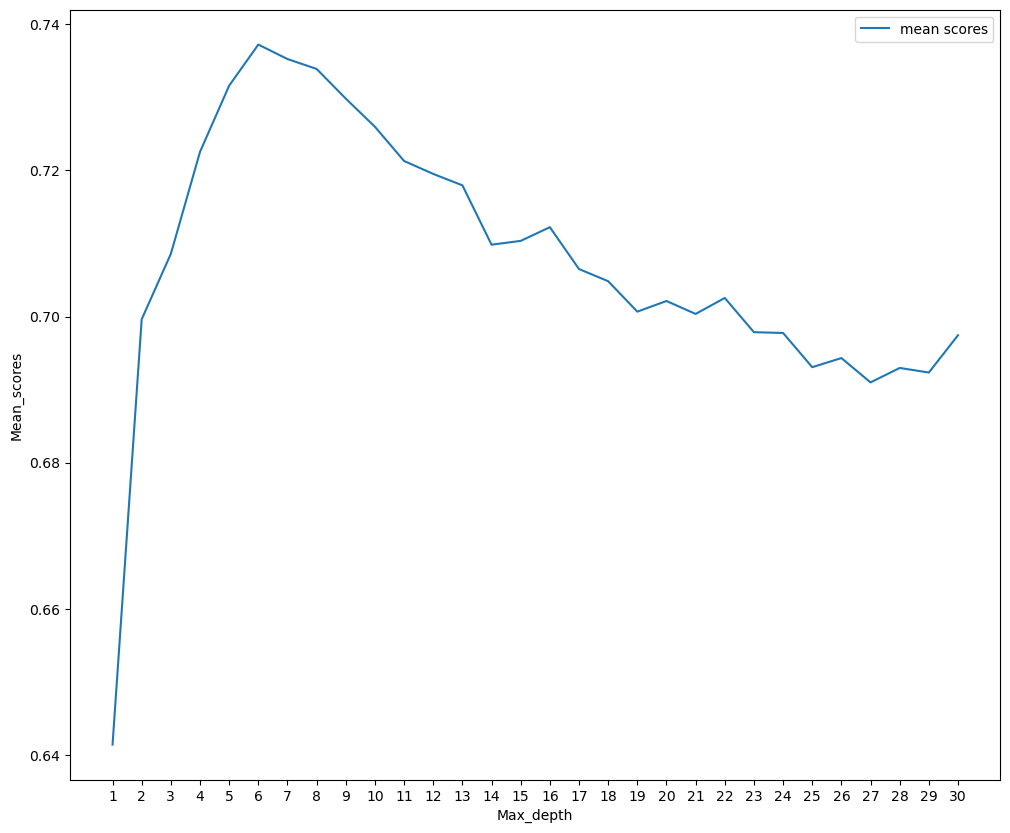

The optimal value for max_depth is:  6


In [17]:
# imports library
from sklearn.model_selection import cross_val_score

# creates a range of integers from 1 to 30 (inclusive) to be used as the max_depth parameter for the decision tree classifier.
max_depth_length = range(1, 31)

#creates an empty list to store the mean cross-validated scores for each max_depth value.
mean_scores = []

# iterates over each max_depth value:
for max_depth in max_depth_length:
    # creates an instance of the DecisionTreeClassifier class with the specified max_depth.
    tree = DecisionTreeClassifier(max_depth=max_depth)
    # performs 5-fold cross-validation
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    # calculates the mean of the accuracy scores obtained from cross-validation and appends it to the mean_scores list.
    mean_scores.append(scores.mean())
    
    
# plotting the mean scores
plt.figure(figsize=(12, 10))
plt.plot(max_depth_length, mean_scores, label='mean scores')
plt.ylabel('Mean_scores')
plt.xlabel('Max_depth')
plt.xticks(max_depth_length)
plt.legend()
plt.show()

# determines the optimal max_depth value by finding the index of the maximum mean score in the mean_scores list
optimal_depth = max_depth_length[mean_scores.index(max(mean_scores))]

print('The optimal value for max_depth is: ', optimal_depth)



In [18]:
# creates an instance of the DecisionTreeClassifier class with the optimal max_depth value.
tree = DecisionTreeClassifier(max_depth=optimal_depth)

#  fits the decision tree model
tree.fit(X_train, y_train)

# uses the trained decision tree model to predict the labels for the test data (X_test)
y_pred_tree = tree.predict(X_test)
 
print('Training score: ', tree.score(X_train, y_train))
print('Test score: ', tree.score(X_test, y_test))

Training score:  0.7607834965617837
Test score:  0.7422076400281228


There is a small performance drop from the training set to the test set, indicating a reasonably good generalization of the model.

The scores are higher are optimization with Decision Treee model using a 5-fold cross validation (An increase from 0.686899460979611 to 0.7424419967190063). This is because the optimization helps us search for the value that maximizes the model's performance on validation data. Also, it helps us generalize the unseen test data by limiting the complexity of the decision tree.

Question 5B: What does your confusion matrix look like for your best model on the test set?

The confusion matrix provides a summary of the predictions made by the model, showing the counts of true positive, true negative, false positive, and false negative predictions. 

In [19]:
# imports confusion_matrix and classification_report functions from library
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
 
#  computes the confusion matrix based on the true labels (y_test) and the predicted labels (y_pred_tree).
matrix = confusion_matrix(y_test, y_pred_tree)

print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.71      0.65      0.68      1809
           1       0.76      0.81      0.78      2458

    accuracy                           0.74      4267
   macro avg       0.74      0.73      0.73      4267
weighted avg       0.74      0.74      0.74      4267



accuracy: The accuracy of the model is 0.74, indicating that it correctly predicts 74% of the samples in the test dataset.

Recall: The model has a lower recall for class 0 compared to class 1. The model correctly identifies 65% of the samples belonging to class 0 and 81% of the samples belonging to class 1.

F1-score: The model has a similar balance between precision and recall for both classes, but the F1-score for class 1 is higher, indicating a better overall performance for class 1.

Support: The number of samples in each class in the test dataset. In this case, there are 1,809 samples of class 0 and 2,458 samples of class 1.

Question 6: Creating a new feature

We can create a new feature which is the ratio of positive to negative words in a review by dividing the "Review_Total_Positive_Word_Counts" by the "Review_Total_Negative_Word_Counts".

It is an important feature because it indicates the sentiment by quantifying the ratio of positive to negative words. A higher ratio of positive words indicates a more positive sentiment, potentially leading to a higher rating.

In [20]:
# combine train and test data into one dataframe
df = pd.concat([train_set, test_set], axis=0)

df.shape

(17065, 2744)

In [21]:
# Calculating the word count ratio
df['word_count_ratio'] = df['Review_Total_Positive_Word_Counts'] / df['Review_Total_Negative_Word_Counts']

# using get_dummies to create dummy variables for the 'word_count_ratio' feature
df = pd.get_dummies(df, columns=['word_count_ratio'], drop_first=True)
 
# checking results
df.head()

,Additional_Number_of_Scoring,Average_Score,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,days_since_review,lat,lng,weekday_of_review,...,word_count_ratio_48.5,word_count_ratio_50.0,word_count_ratio_51.5,word_count_ratio_54.75,word_count_ratio_58.5,word_count_ratio_60.8,word_count_ratio_65.0,word_count_ratio_68.5,word_count_ratio_79.5,word_count_ratio_inf
0,620,9.0,0,1974,164,1,562,51.506558,-0.004514,1,...,0,0,0,0,0,0,0,0,0,1
1,1258,9.4,6,4204,4,5,276,51.502435,-0.000250,0,...,0,0,0,0,0,0,0,0,0,0
2,995,8.1,2,3826,38,1,129,51.504348,-0.033444,0,...,0,0,0,0,0,0,0,0,0,0
3,853,8.4,7,2726,10,10,164,51.507377,0.038657,0,...,0,0,0,0,0,0,0,0,0,0
4,1243,8.1,11,6608,8,69,639,51.513556,-0.180002,1,...,0,0,0,0,0,0,0,0,0,0


In [22]:
# separate the independent variables (features) from the target variable ('rating') 
X = df.drop('rating', axis=1)
y = df['rating']

# imports the train_test_split function from scikit-learn.
from sklearn.model_selection import train_test_split

#splits the data into training and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)
 
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (13652, 4933)
X_test shape:  (3413, 4933)
y_train shape:  (13652,)
y_test shape:  (3413,)


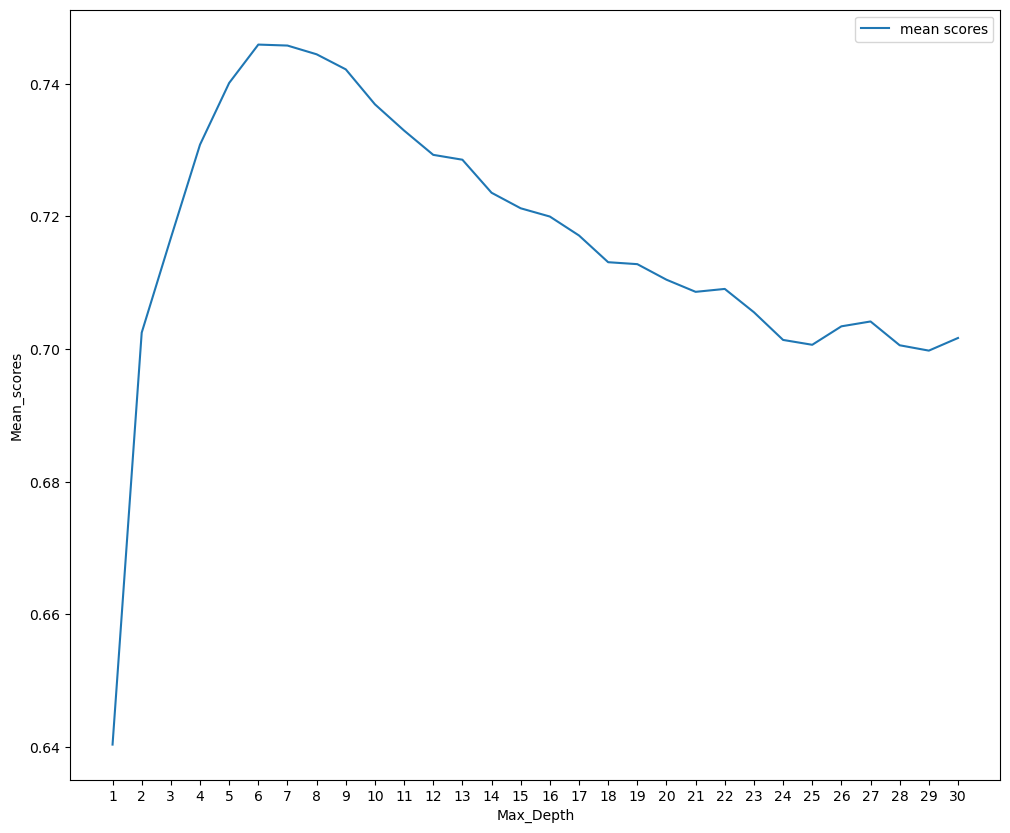

The optimal value for max_depth is:  6


In [27]:
#  import the cross_val_score function and the DecisionTreeClassifier class from the scikit-learn library.
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier


# creates a range of integers from 1 to 30 (inclusive) to be used as the max_depth parameter for the decision tree classifier.
max_depth_length = range(1, 31)
#  creates an empty list to store the mean cross-validated scores for each max_depth value.
mean_scores = []
 
#iterates over each max_depth value:
for max_depth in max_depth_length:
    #creates an instance of the DecisionTreeClassifier class with the specified max_depth.
    tree = DecisionTreeClassifier(max_depth=max_depth)
    # performs 5-fold cross-validation
    scores = cross_val_score(tree, X_train, y_train, cv=5)
    #calculates the mean of the accuracy scores obtained from cross-validation and appends it to the mean_scores list.
    mean_scores.append(scores.mean())

    
# plotting the mean scores
plt.figure(figsize=(12, 10))
plt.plot(max_depth_length, mean_scores, label='mean scores')
plt.ylabel('Mean_scores')
plt.xlabel('Max_Depth')
plt.xticks(max_depth_length)
plt.legend()
plt.show()

#determines the optimal max_depth value by finding the index of the maximum mean score in the mean_scores list 
optimal_depth = max_depth_length[mean_scores.index(max(mean_scores))]
print('The optimal value for max_depth is: ', optimal_depth)



In [24]:
# creates an instance of the DecisionTreeClassifier class
tree = DecisionTreeClassifier(max_depth=optimal_depth)

# fits the decision tree model
tree.fit(X_train, y_train)
 
# uses the trained decision tree model to predict the labels for the test data (X_test)
y_pred_tree_2 = tree.predict(X_test)
 
print('Training score: ', tree.score(X_train, y_train))
print('Test score: ', tree.score(X_test, y_test))

Training score:  0.7665543510108409
Test score:  0.7465572809844712


First, there is a small performance drop from the training set to the test set, indicating a reasonably good generalization of the model. Second, the test score increases from  0.7368174361378017 to 0.7546285446449497, which is a total of 2.4% increase in accuracy. 

In [25]:
#imports the classification_report and confusion_matrix functions from the scikit-learn library.
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#computes the confusion matrix based on the true labels (y_test) and the predicted labels (y_pred_tree_2)
matrix = confusion_matrix(y_test, y_pred_tree_2)
 
print(classification_report(y_test, y_pred_tree_2))

              precision    recall  f1-score   support

           0       0.70      0.69      0.70      1447
           1       0.78      0.78      0.78      1966

    accuracy                           0.75      3413
   macro avg       0.74      0.74      0.74      3413
weighted avg       0.75      0.75      0.75      3413



The overall accuracy increases from 0.74 to 0.75 after adding the new feature.

Accuracy: The accuracy of the model is 0.75, indicating that it correctly predicts 75% of the samples in the test dataset.

Precision: The model's predictions of class 0 and class 1 have relatively high precision, meaning that when the model predicts a sample as class 0 or class 1, it is correct in approximately 73% and 77% of cases, respectively.

Recall: The model has a lower recall for class 0 compared to class 1. The model correctly identifies 67% of the samples belonging to class 0 and 82% of the samples belonging to class 1.

The F1-score: The model has a similar balance between precision and recall for both classes, but the F1-score for class 1 is higher, indicating a better overall performance for class 1.

Conclusion:

During this project, I delved into the exciting world of machine learning, aiming to construct a model capable of predicting the sentiment of hotel reviews. The journey involved various steps, starting with the creation of a basic model as a reference point. Subsequently, I put my efforts into optimizing the models and even introduced a new feature to enhance their performance. Additionally, I acquired the skills to interpret the outcomes of the models, such as examining the confusion matrix, accuracy score, precision score, and recall score. Ultimately, I accomplished the objective by building a model that boasts an accuracy score of 0.74, indicating that it accurately classifies 74% of the reviews in our test dataset.




